In [245]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [246]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
datosGeneracion_sel = datosGeneracion[['Generacion_diff', 'NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]
datosGeneracion_sel.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,CoberturaNubes,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,NaN,27,180,144600,NaN,NaN,NaN,NaN,NaN,70,NaN,4,4,NaN,NaN,NaN
1,NaN,27,180,144601,NaN,NaN,NaN,NaN,NaN,70,NaN,2,4,NaN,NaN,NaN
2,NaN,27,180,144602,NaN,NaN,NaN,NaN,NaN,70,NaN,2,4,NaN,NaN,NaN
3,NaN,27,180,144603,NaN,NaN,NaN,NaN,NaN,70,NaN,2,4,NaN,NaN,NaN


In [248]:
datosGeneracion_dropna = datosGeneracion_sel.dropna()
datosGeneracion_dropna.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,CoberturaNubes,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,0.0,27,181,144624,-1.0,4.0,1.0,-2.0,0.0,70,0.0,4,4,-2.0,0.0,0.0
25,0.0,27,181,144625,0.0,8.0,0.0,0.0,0.0,70,0.0,4,4,-2.0,0.0,0.0
26,0.0,27,181,144626,0.0,5.0,2.0,-2.0,0.0,70,0.0,2,4,-2.0,0.0,0.0
27,0.0,27,181,144627,-1.0,0.0,1.0,0.0,0.0,70,0.0,2,4,-2.0,0.0,-1.0


In [249]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_dropna)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_dropna.columns, index = datosGeneracion_dropna.index)
datosGeneracion_scaled.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,CoberturaNubes,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,0.500199,0.5,0.502778,0.000000,0.447368,0.527950,0.500000,0.559045,0.494949,0.7,0.444444,0.75,0.375,0.494208,0.563265,0.507246
25,0.500199,0.5,0.502778,0.000053,0.473684,0.552795,0.494048,0.584171,0.494949,0.7,0.444444,0.75,0.375,0.494208,0.563265,0.507246
26,0.500199,0.5,0.502778,0.000105,0.473684,0.534161,0.505952,0.559045,0.494949,0.7,0.444444,0.25,0.375,0.494208,0.563265,0.507246
27,0.500199,0.5,0.502778,0.000158,0.447368,0.503106,0.500000,0.584171,0.494949,0.7,0.444444,0.25,0.375,0.494208,0.563265,0.492754


In [250]:
datosGeneracion_train = datosGeneracion_scaled.sample(frac = 0.7)
y_train = datosGeneracion_train[['Generacion_diff']]
x_train = datosGeneracion_train[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [251]:
datosGeneracion_test = datosGeneracion_scaled.drop(datosGeneracion_train.index)

y_test = datosGeneracion_test[['Generacion_diff']]
x_test = datosGeneracion_test[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

In [252]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

In [253]:
def fit(x, y, reg_model = 'RF', n_components = 3, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'LassoReg':
            model = Lasso(alpha = 0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha = 0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'VotingEnsemble':
            gb = GradientBoostingRegressor()
            rf = RandomForestRegressor(n_jobs = n_jobs)
            br = BaggingRegressor(n_jobs = n_jobs)
            ab = AdaBoostRegressor()
            gb.fit(x, y)
            rf.fit(x, y)
            br.fit(x, y)
            ab.fit(x, y)
            model = VotingRegressor([("gb", gb), ("rf", rf), ("br", br), ("ab", ab)], n_jobs = n_jobs)
        case 'VotingLinear':
            pl = PLSRegression(n_components = n_components)
            lr = LinearRegression(n_jobs = n_jobs)
            ri = Ridge(alpha = 0.1)
            la = Lasso(alpha = 0.1)
            pc = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
            pl.fit(x, y)
            lr.fit(x, y)
            ri.fit(x, y)
            la.fit(x, y)
            pc.fit(x, y)
            model = VotingRegressor([("pl", pl), ("lr", lr), ("ri", ri), ("la", la), ("pc", pc)], n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [254]:
from tqdm import tqdm

import multiprocessing

from timeit import default_timer as timer

In [255]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [256]:
try:
        df_results_ed = pd.read_csv('./Resultados_modelos.csv', index_col = 0)
except:
        models_ed = ['AdaBoost', 'Boosting', 'DecisionTree', 'LassoReg', 'PCR',
                      'Bagging', 'RF', 'LinearReg', 'BayesRidge', 'RidgeReg', 'PLS']
        n_jobs = multiprocessing.cpu_count()
        results_ed = {
                'model' : [],
                'mape' : [],
                'mae' : [],
                'time' : []
        }
        for i in tqdm(range(30)):
                for m in models_ed:
                        start = timer()
                        model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                        end = timer()
                        y_pred = model.predict(x_test)
                        results_ed['model'].append(m)
                        results_ed['mape'].append(mape(y_test, y_pred))
                        results_ed['mae'].append(mae(y_test, y_pred))
                        results_ed['time'].append(end - start)

                df_results_ed = pd.DataFrame(results_ed)
                df_results_ed = df_results_ed.sort_values('mape')
                df_results_ed.to_csv('./Resultados_modelos.csv')

In [257]:
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')

In [258]:
# Paquete para más opciones gráficas
import seaborn as sns

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

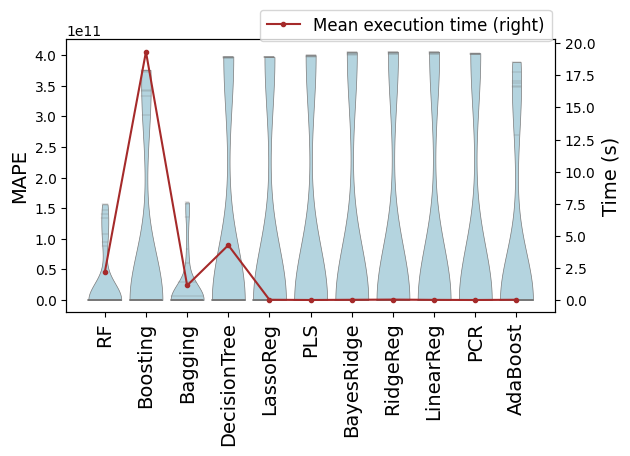

In [259]:
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')
#patch = mpatches.Patch(color='lightblue', label='MAPE (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Mean execution time (right)')
plt.ylabel('Time (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

In [260]:
modelB2 = BaggingRegressor(n_jobs=n_jobs)
modelB2.fit(x_train, y_train)

BaggingRegressor(n_jobs=4)

In [261]:
y_pred = modelB2.predict(x_test)

In [262]:
#Bagging
mae(y_test, y_pred)

0.04190317729286164

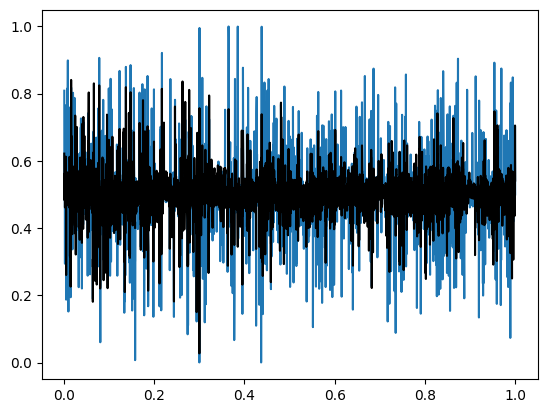

In [263]:
#Bagging
plt.plot(x_test["Hora"], y_test)
plt.plot(x_test["Hora"], y_pred, c = 'black')

In [264]:
df_y_pred = pd.DataFrame(y_pred, index = y_test.index, columns = ['Generacion_diff'])
df_y_pred

,Generacion_diff
34,0.621592
35,0.510175
38,0.494446
44,0.483036
51,0.500152
...,...
18933,0.536853
18934,0.527253
18935,0.557747
18938,0.705018


In [265]:
#Indicamos las filas que han sido predecidas por el método Bagging
datosGeneracion['predecida'] = 0
datosGeneracion.loc[df_y_pred.index, 'predecida'] = 1

In [266]:
#Igualamos la predición con la generación
datosGeneracion['prediccion_diff'] = datosGeneracion_scaled['Generacion_diff']

In [267]:
#Asignamos los datos de predicción a la columna
datosGeneracion.loc[df_y_pred.index, 'prediccion_diff'] = df_y_pred['Generacion_diff']

In [268]:
datosGeneracion[['Generacion_diff', 'prediccion_diff', 'predecida']].head(50)

,Generacion_diff,prediccion_diff,predecida
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
5,NaN,NaN,0
6,NaN,NaN,0
7,NaN,NaN,0
8,NaN,NaN,0
9,NaN,NaN,0


In [269]:
#Obtenemos el máximo y el mínimo para desecalar
max_value = datosGeneracion_dropna["Generacion_diff"].max()
min_value = datosGeneracion_dropna["Generacion_diff"].min()

In [270]:
#Desescalamos
datosGeneracion["Prediction"] = round((datosGeneracion["prediccion_diff"] * (max_value - min_value)) + min_value, 2)

In [271]:
datosGeneracion['Prediction_final'] = 0

In [272]:
datosGeneracion.loc[0:24, 'Prediction'] = datosGeneracion.loc[0:24, 'Generacion']
datosGeneracion.loc[0:24, 'Prediction_final'] = datosGeneracion.loc[0:24, 'Generacion']

In [316]:
for i in range(24, len(datosGeneracion)):
    datosGeneracion['Prediction_final'][i] = min(max(datosGeneracion['Prediction'][i] + datosGeneracion["Prediction_final"][i-24], 0), 30000)

In [317]:
datosGeneracion['Prediction_UV'] = datosGeneracion['Prediction_final']
datosGeneracion.loc[datosGeneracion['IndiceUV'] == 0, 'Prediction_UV'] = 0

In [318]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_final']])

9011.1744939829

In [319]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_UV']])

3800.9378285970656

In [320]:
datosGeneracion.loc[0:50,['Generacion', 'Prediction', 'Prediction_final', 'Prediction_UV', 'predecida']]

,Generacion,Prediction,Prediction_final,Prediction_UV,predecida
0,0.0000,0.0000,0.0000,0.0000,0
1,0.0000,0.0000,0.0000,0.0000,0
2,0.0000,0.0000,0.0000,0.0000,0
3,0.0000,0.0000,0.0000,0.0000,0
4,0.0000,0.0000,0.0000,0.0000,0
5,0.0000,0.0000,0.0000,0.0000,0
6,0.0000,0.0000,0.0000,0.0000,0
7,252.4751,252.4751,252.4751,0.0000,0
8,789.4489,789.4489,789.4489,789.4489,0
9,1484.4438,1484.4438,1484.4438,1484.4438,0


In [304]:
def line_plotting(title, data, x, y, y2, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')   
    plt.plot(data[x], data[y2], color='black')  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

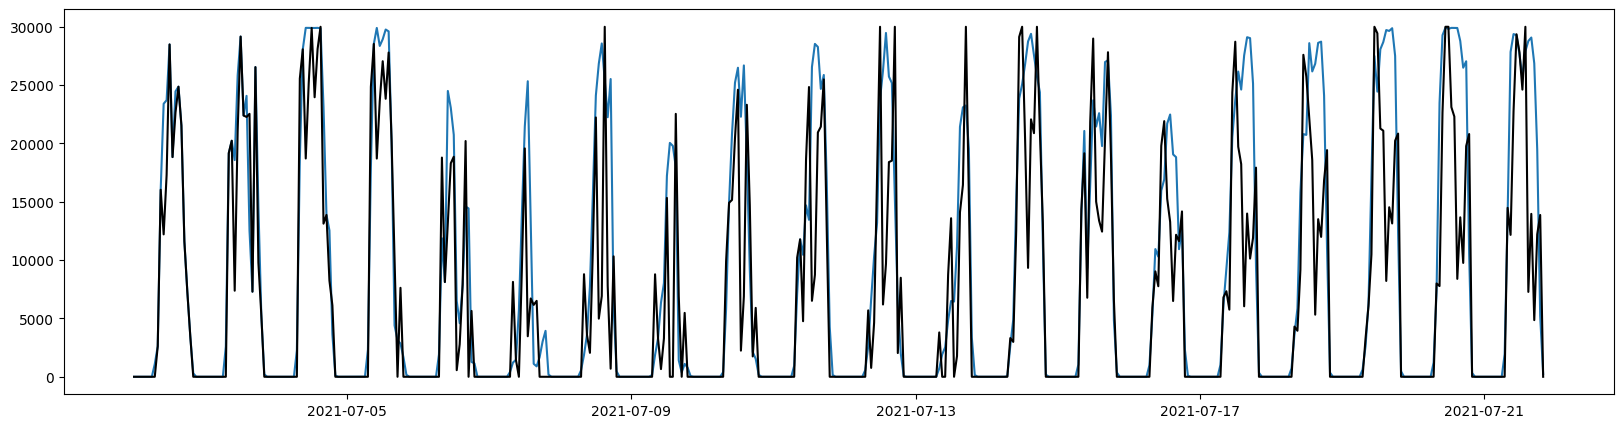

In [329]:
plt.figure(figsize=(20,5))
plt.plot(datosGeneracion.loc[24:500, "Fecha"], datosGeneracion.loc[24:500, "Generacion"])
plt.plot(datosGeneracion.loc[24:500, "Fecha"], datosGeneracion.loc[24:500, "Prediction_UV"], c = 'black')

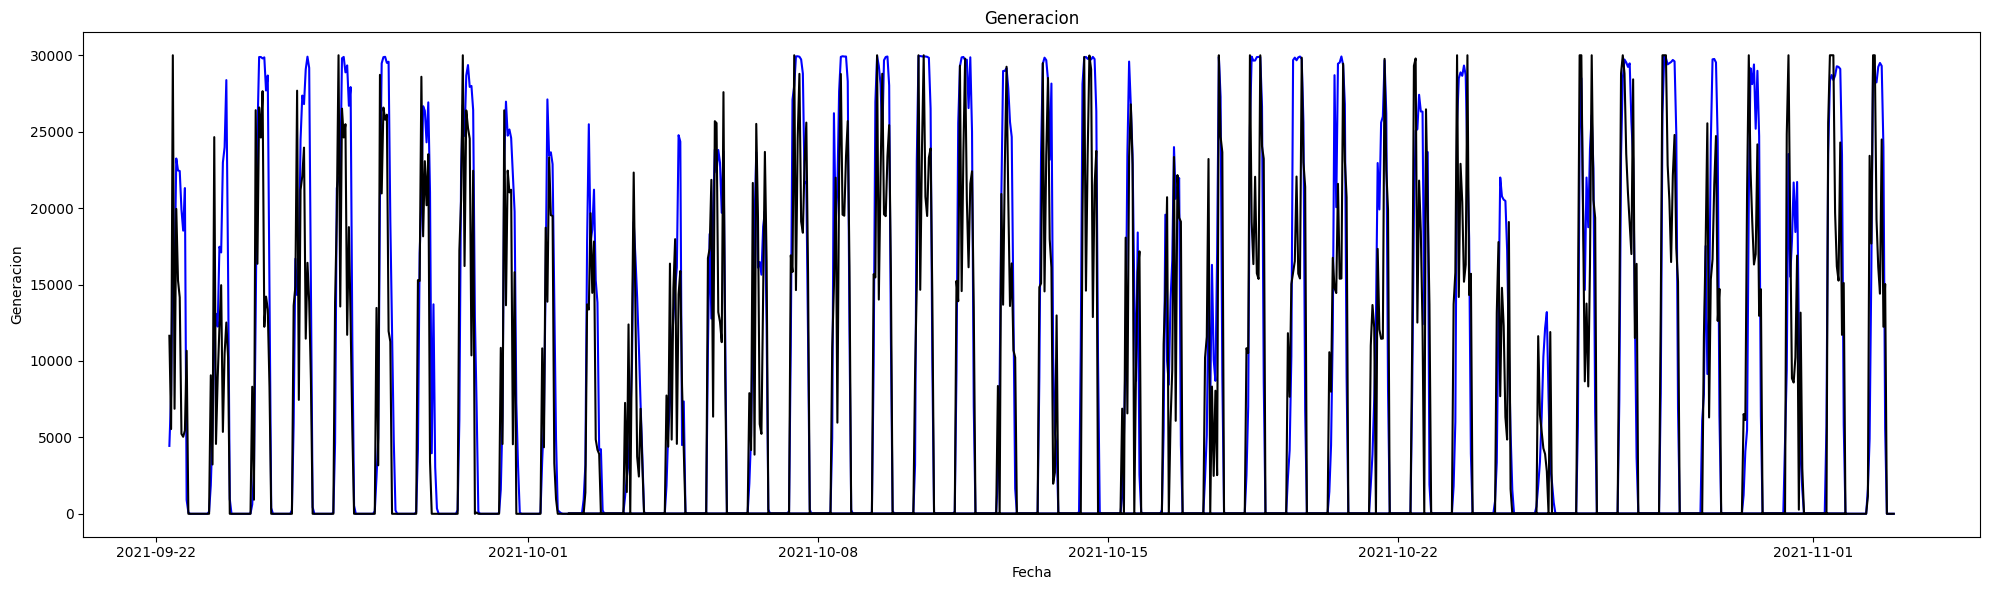

In [322]:
line_plotting('Generacion', datosGeneracion[2000:3000], 'Fecha', 'Generacion', 'Prediction_UV', 'Fecha', 'Generacion', 20, 6)